In [244]:
import datajoint as dj
from faker import Faker
fake = Faker()
schema = dj.Schema('Hiring')

In [245]:
@schema
class Manager(dj.Manual):
    definition="""
    manager_id : bigint unsigned  
    ---
    first_name : varchar(30) 
    last_name : varchar(30) 
    phone : bigint 
    email : varchar(30) 
    """

In [247]:
@schema
class Job(dj.Manual):
    definition = """
    job_id : varchar(12)   
    ---
    -> Manager
    job_title : varchar(30) 
    open_date : date 
    description : varchar(200) 
    minimum_annual_salary : bigint unsigned  
    maximum_annual_salary : bigint unsigned  
    """
    class Skill(dj.Part):
        definition = """
        -> master
        -> Skill
        """

In [246]:
@schema
class Skill(dj.Lookup):
    definition = """
    skill : varchar(24)
    """
    
    

In [248]:
@schema
class Applicant(dj.Manual):
    definition = """
    applicant_id : varchar(15) 
    ---
    first_name : varchar(30) 
    last_name : varchar(30) 
    phone : bigint unsigned  
    email : varchar(30)
    """
    class Skill(dj.Part):
        definition = """
        -> master
        -> Skill
        """

In [249]:
@schema
class Application(dj.Manual):
    definition = """
    -> Applicant
    -> Job
    --- 
    """

In [250]:
@schema
class Interview(dj.Manual):
    definition = """
    -> Application
    ---
    interview_date : date 
    """

In [251]:
@schema
class Offer(dj.Manual):
    definition = """
    -> Interview
    ---
    start_date : date
    salary : bigint unsigned  
    """

In [252]:
@schema
class Acceptance(dj.Manual):
    definition = """
    -> Offer
    --- 
    """

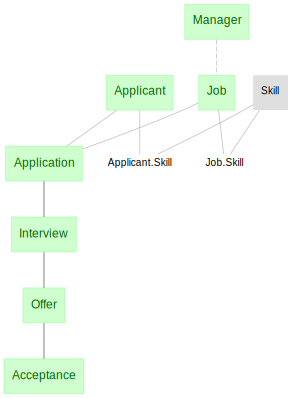

In [253]:
dj.Diagram(schema)

In [243]:
schema.drop()

Populate

In [254]:
import random
from tqdm import tqdm
from faker import Faker
fake = Faker()

In [255]:
Faker.seed(0)
Manager.insert(dict(
    manager_id=fake.random_int(100000, 900000),
    first_name=fake.first_name(),
    last_name=fake.last_name(),
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    email=fake.email()) for _ in range(10))

In [256]:
Manager()

manager_id,first_name,last_name,phone,email
134574,Chloe,Douglas,20636619644,sheltondavid@example.org
300348,Sally,Walker,72461666241,millerluke@example.net
373145,Bryan,Sellers,13934166345,cortezraymond@example.net
475441,Brandy,Odonnell,29347482742,donald19@example.com
503958,Katherine,Fisher,76620417634,thull@example.com
613054,Daniel,Arnold,25919560061,lisa83@example.net
658433,Tonya,Patrick,31054642443,corey15@example.com
673812,Briana,Wallace,54602810789,kellylopez@example.org
687007,Craig,Hamilton,98523085497,tammywoods@example.net
755638,Aaron,Snyder,56675998506,jessicapadilla@example.org


In [257]:
keys = Manager.fetch("KEY")

In [258]:
for index in range(1, 18):
    skill_list=["SQL","Python","Excel","Word","JAVA","Tableu","R Language","Database Management","Powerpoint","C++ Language","Rust"] 
    Skill.insert1(dict(
    skill=fake.random.choices(skill_list)
    ),skip_duplicates=True)

In [259]:
Skill()

skill
C++ Language
Database Management
JAVA
Powerpoint
R Language
Rust
Tableu
Word


In [262]:
Job()

job_id,manager_id,job_title,open_date,description,minimum_annual_salary,maximum_annual_salary
b9-5331889F,373145,Database Admin,2024-02-21,"designing, building, and maintaining the infrastructure that supports data storage, processing, and retrieval.",75000,104000
C9-6943858n,755638,Data Scientist,2024-03-09,"designing, building, and maintaining the infrastructure that supports data storage, processing, and retrieval.",50000,129000
D6-2084932w,673812,Data Engineer,2024-01-19,"collects large amounts of data using analytical, statistical, and programmable skills.,gather and scrutinise data using specialist tools to generate information that helps others make decisions.",42000,106000
d7-7843350J,687007,Data Analyst,2024-01-02,"designing, building, and maintaining the infrastructure that supports data storage, processing, and retrieval.",76000,143000
E9-7204107h,613054,Database Admin,2024-03-19,ensure that the overall system run efficiently and securely,62000,148000
f1-2207807e,503958,Database Admin,2024-03-15,ensure that the overall system run efficiently and securely,47000,123000
f3-2879298o,658433,Data Engineer,2024-03-02,ensure that the overall system run efficiently and securely,61000,96000
F6-0486311W,673812,Data Scientist,2024-02-27,"collects large amounts of data using analytical, statistical, and programmable skills.,gather and scrutinise data using specialist tools to generate information that helps others make decisions.",52000,127000
g0-8691000R,687007,Data Administrator,2024-01-13,"identifies trends, patterns, and anomalies found in big data sets by performing extensive data analysis to develop insights.",34000,131000
g2-5606095Y,373145,Data Scientist II,2024-02-11,"designing, building, and maintaining the infrastructure that supports data storage, processing, and retrieval.",66000,130000


In [261]:
Faker.seed(0)

for index in range(1, 22):  
    job_list = ["Data Engineer", "Data Scientist II", "Data Administrator", "Data Scientist","Data Analyst","Database Admin"]
    description_list =["designing, building, and maintaining the infrastructure that supports data storage, processing, and retrieval.","identifies trends, patterns, and anomalies found in big data sets by performing extensive data analysis to develop insights.","create or organize systems to store different data types, such as financial information and customer shipping records." ,"collects large amounts of data using analytical, statistical, and programmable skills.,gather and scrutinise data using specialist tools to generate information that helps others make decisions." ,"ensure that the overall system run efficiently and securely"]

    Job.insert1(dict(
    random.choice(keys),
    job_id=fake.pystr_format(),
    job_title=fake.random.choice(job_list),
    open_date=fake.date_between(start_date='+20d',end_date='+120d'),
    description=fake.random.choice(description_list),
    minimum_annual_salary=fake.random_int(min=30000, max=80000, step=1000),
    maximum_annual_salary=fake.random_int(min=90000, max=150000, step=1000)
    ))

   

In [263]:
Job.Skill.insert(
    Job.proj() * Skill & 'RAND() < 0.3')

In [264]:
Job.Skill()

job_id,skill
g0-8691000R,C++ Language
g2-5606095Y,C++ Language
N2-4213578G,C++ Language
p0-8425503V,C++ Language
C9-6943858n,Database Management
d7-7843350J,Database Management
F6-0486311W,Database Management
g0-8691000R,Database Management
g2-5606095Y,Database Management
m9-3426306u,Database Management


In [269]:
Applicant()

applicant_id,first_name,last_name,phone,email
A1-6116914f,Kim,Navarro,67753216629,ujohnson@example.net
a3-8938169O,Matthew,Estes,56810883075,austin24@example.net
A5-8064064C,Alan,Hayden,56820565210,sharris@example.com
b9-8913584c,David,Lopez,90874604127,myersmitchell@example.org
c1-1224260E,Megan,Villanueva,81748645873,aimee33@example.net
c1-7207518d,Carmen,Anderson,24276090565,james71@example.org
c7-6963922o,Richard,Miles,31675753711,sbrown@example.org
c7-8907313H,Troy,Collins,16300254181,olopez@example.org
d4-5623618e,William,Williams,65784045185,jorgestrong@example.com
d7-7843350J,Linda,Dunn,18650243240,ypage@example.net


In [266]:
Faker.seed(0)
Applicant.insert(dict(
    applicant_id=fake.pystr_format(),
    first_name=fake.first_name(),
    last_name=fake.last_name(),
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    email=fake.email()) for _ in range(50))

In [267]:
Faker.seed(0)
Applicant.Skill.insert(
    Applicant.proj() * Skill & 'RAND() < 0.3')


In [268]:
Applicant.Skill()

applicant_id,skill
a3-8938169O,C++ Language
c1-1224260E,C++ Language
c7-8907313H,C++ Language
E0-3554230i,C++ Language
E2-5715576H,C++ Language
f9-2674934I,C++ Language
J5-6428332t,C++ Language
K1-9728952j,C++ Language
L8-2367134x,C++ Language
M9-6764745I,C++ Language


In [270]:
Application()

applicant_id,job_id


In [271]:
keys = Applicant.fetch("KEY")

In [272]:
Faker.seed(0)

application = (Applicant * Job - Application.proj()).fetch("KEY", order_by=('applicant_id', 'job_id'))
Application.insert(random.sample(application, 60))

In [273]:
key=Application.fetch("KEY")

In [274]:
Faker.seed(0)
for index in range(1, 41):
    Interview.insert1(dict(
    random.choice(key),
    interview_date=fake.date_between(start_date='+30d',end_date='+90d')),skip_duplicates=True)

In [275]:
Interview()

applicant_id,job_id,interview_date
b9-8913584c,X7-9235874U,2024-02-13
c1-1224260E,V9-2465885L,2024-03-04
c7-8907313H,p0-9756534T,2024-03-06
d4-5623618e,p0-8425503V,2024-01-17
E0-321596M,f3-2879298o,2024-02-19
E0-321596M,I4-1854938J,2024-03-01
E0-321596M,w5-7811208R,2024-02-16
F6-0486311W,g0-8691000R,2024-02-28
g1-5877339f,g2-5606095Y,2024-03-09
h4-485580e,p0-8425503V,2024-02-09


In [280]:
Offer()

applicant_id,job_id,start_date,salary
c1-1224260E,V9-2465885L,2024-02-23,95000
d4-5623618e,p0-8425503V,2024-01-29,119000
E0-321596M,I4-1854938J,2024-03-14,52000
F6-0486311W,g0-8691000R,2024-02-10,104000
h4-485580e,p0-8425503V,2024-03-07,91000
J5-6428332t,V9-2465885L,2024-02-21,100000
K1-9728952j,d7-7843350J,2024-02-14,105000
M1-4181491l,p0-9756534T,2024-02-18,101000
M7-627909c,C9-6943858n,2024-02-02,136000
q3-1768614C,I4-1854938J,2024-02-23,114000


In [277]:
key=Interview.fetch("KEY")

In [278]:
Faker.seed(0)
for index in range(1, 20):
    Offer.insert1(dict(
    random.choice(key),
    start_date=fake.date_between(start_date='+40d',end_date='+100d'),
    salary=fake.random_int(min=40000, max=150000, step=1000)),skip_duplicates=True)

In [283]:
Acceptance()

applicant_id,job_id
E0-321596M,I4-1854938J
F6-0486311W,g0-8691000R
K1-9728952j,d7-7843350J
M7-627909c,C9-6943858n
q3-1768614C,I4-1854938J
R7-9519996S,C9-6943858n
y2-7585416k,b9-5331889F
Z4-7198965L,M1-0138752M


In [281]:
key=Offer.fetch("KEY")

In [282]:
Faker.seed(0)
for index in range(1, 10):
    Acceptance.insert1(dict(
    random.choice(key),
    ),skip_duplicates=True)

Queries 